hugo.deplagne  
pierre.litoux  
SCIA 2024

L'objectif de base du défi EGC 2024 étant une analyse du jeu de données et une possible prédiction du cours de la blockchain BTC pour le futur. Afin d'extirper un sujet d'analyse de ce jeu de données nous nous sommes concentrées sur les actions qu'ont les acteurs durant toute la période observée. Cette partie semble intéressante afin de déterminer un comportement favorable à une augmentation de profits. Puis nous nous sommes centralisés sur la répartition des profits et des transactions entre acteurs.

### La question que l'on se pose est la suivante :

### Comment est répartie l'accumulation en BTC des acteurs grâce à leurs transactions ?
---

Notre analyse va porter sur l'année de 2015 afin d'avoir une vision sur une période précise et délimitée.

Notre objectif est de diviser les acteurs en différents groupes en fonction de leurs bénéfices sur cette période. Puis de comparer ces groupes sur la blockchain :  
On tient à rappeler que les jeux de données ne sont pas exhaustives et ne comportent que les 100 plus gros acteurs sur cette période.  

Au final de cette analyse nous voulons mettre en valeur l'importance des différences de profits entre chaque acteur.

#### Mise en place


In [98]:
# library imports
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [99]:
# set paths
ext_path = './DefiEGC2024/timeseries/external.csv'
glob_path = './DefiEGC2024/timeseries/global.csv'
actor_path = './DefiEGC2024/timeseries/blockchain_by_actor.csv'

Récupération et nettoyage des différents jeux de données.

In [100]:
# extraction of all the csv files in the folder into dataframes
external_df = pd.read_csv(ext_path, sep=',', header=0, index_col=1, parse_dates=True)
external_df.drop(['Unnamed: 0'], axis=1, inplace=True)

transactions_df = pd.read_csv(glob_path, sep=',', header=0, index_col=0, parse_dates=True)
# drop the original "year", "month", and "day" columns
transactions_df.drop(columns=['year', 'month', 'day'], inplace=True)

actor_df = pd.read_csv(actor_path , index_col=0)
# Remove lines where year = 0
actor_df = actor_df[actor_df['year'] != 0]
# combine "year", "month", and "day" columns into a single datetime column
actor_df['date'] = pd.to_datetime(actor_df[['year', 'month', 'day']])
# drop the original "year", "month", and "day" columns
actor_df.drop(columns=['year', 'month', 'day'], inplace=True)
# Change the nb_received and nb_transactions and nb_spent and sum_fee columns to integers
actor_df = actor_df.astype({'nb_received': 'int64', 'nb_transactions': 'int64', 'nb_spent': 'int64', 'sum_fee': 'int64'})

print('loading data done')


loading data done


Pour notre étude on va s'intérésser seulement a l'année 2015

In [101]:
# only keep data of 2015
external_df = external_df[external_df.index.year == 2015]
external_df.head(2)

,PriceUSD,HashRate
date,,
2015-01-02,315.942732,333345.017260
2015-01-03,285.647310,327284.198765


In [102]:
transactions_df = transactions_df[transactions_df.index.year == 2015]
transactions_df.head(2)

,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
2015-01-01,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
2015-01-02,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762


In [103]:
actor_df = actor_df[actor_df['date'].dt.year == 2015]
actor_df.head(2)

,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,HappyCoins.com,1.377590e+09,4,2015-01-01,49596,0.004957,4,1.277500e+09,0.0,0.0,8,1.277500e+09
1,821,2.476057e+09,5,2015-01-01,10000,0.000851,1,1.174552e+09,0.0,0.0,2,1.174552e+09


On veut récupérer les acteurs ayant fait le plus de profit en dollars sur toute la période proposée, pour cela on calcul le bénéfice journalier (balance) effectué grace à cette formule

balance = received - (spent - self_spent) - sum_fee

In [104]:
actor_df.set_index('identity', inplace=True)
actor_df = actor_df.groupby([actor_df.index, 'date']).sum()

# add a new column to the actor_df dataframe that contains the balance of the actor calculated as : received - (spent - self_spent) - sum_fee
actor_df['balance'] = actor_df['received'] - (actor_df['spent'] - actor_df['self_spent']) - actor_df['sum_fee']
actor_df.head(3)

received  nb_received   sum_fee  mean_fee_for100  \
identity date                                                               
0        2015-01-01  3.021860e+10         4265  12350755         1.926137   
         2015-01-02  3.401216e+10         8395  15588104         1.882565   
         2015-01-03  2.546280e+11        10004  14742886         1.984796   

                     nb_transactions          sent  self_spent  \
identity date                                                    
0        2015-01-01              783  3.001272e+10         0.0   
         2015-01-02              962  3.400937e+10         0.0   
         2015-01-03              943  2.517348e+11         0.0   

                     self_spent_estimated  nb_spent         spent  \
identity date                                                       
0        2015-01-01          0.000000e+00      1696  3.001272e+10   
         2015-01-02          0.000000e+00      2068  3.400937e+10   
         2015-01-03          2.011365e+11      2039  5.059830e+10   

                          balance  
identity date                      
0        2015-01-01  1.935257e+08  
         2015-01-02 -1.280615e+07  
         2015-01-03  2.040150e+11

On récupère le profit, cela correspond à la somme des bénéfices journaliers depuis le début jusqu'au jour voulu.  
Le profit total est donc le profit du dernier jour

In [105]:
# compute the profits wich is the cumsum of each actor balance
actor_df['profit'] = actor_df.groupby(level=0)['balance'].cumsum()

actor_df.loc['ePay.info_CoinJoinMess'].head(3)

,received,nb_received,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent,balance,profit
date,,,,,,,,,,,,
2015-01-01,5.482961e+11,12818,38239914,0.524910,1148,2.470622e+12,1.794224e+12,1.898125e+12,20749,5.724979e+11,1.769984e+12,1.769984e+12
2015-01-02,1.259197e+12,19625,62774624,0.433979,2145,4.627579e+12,3.294133e+12,3.310133e+12,41870,1.317446e+12,3.235821e+12,5.005805e+12
2015-01-03,1.505475e+12,17609,65207667,0.702425,1696,4.967562e+12,3.536510e+12,3.536510e+12,24355,1.431051e+12,3.610868e+12,8.616673e+12


On compare ci-dessous le bénéfice de quelques acteurs

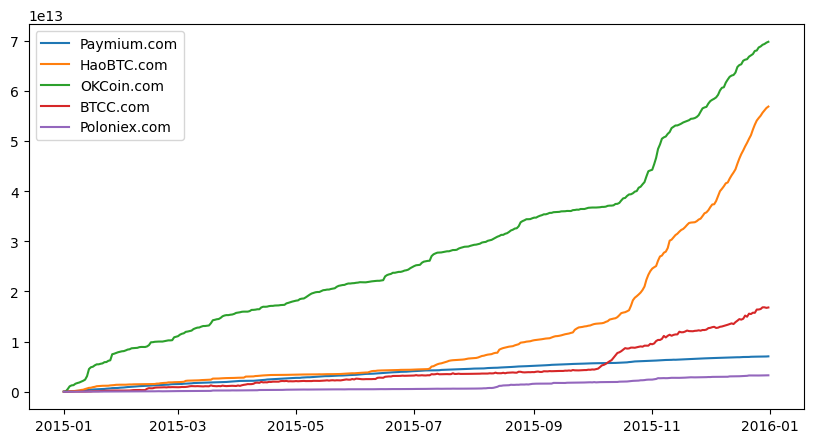

In [106]:
plt.figure(figsize=(10,5))
look = ['profit']
plt.plot(actor_df.loc['Paymium.com'].index, actor_df.loc['Paymium.com'][look], label='Paymium.com')
plt.plot(actor_df.loc['HaoBTC.com'].index, actor_df.loc['HaoBTC.com'][look], label='HaoBTC.com')
plt.plot(actor_df.loc['OKCoin.com'].index, actor_df.loc['OKCoin.com'][look], label='OKCoin.com')
plt.plot(actor_df.loc['BTCC.com'].index, actor_df.loc['BTCC.com'][look], label='BTCC.com')
plt.plot(actor_df.loc['Poloniex.com'].index, actor_df.loc['Poloniex.com'][look], label='Poloniex.com')
plt.legend()
plt.show()

Nous allons passer le profit en USDollar pour avoir une meilleur idée de l'ordre de grandeur

In [107]:
# using the profit column and the external_df dataframe, we can compute the profit of the exchanges in USD
# we need to convert the profit in BTC to USD

# first we need to create a small dataframes with only the date, the actor and the profit
actor_profits_df = actor_df[['profit']]

# we need to compute the profit in USD using the external_df dataframe
# we need to merge the two dataframes on the date column
actor_profits_df = actor_profits_df.merge(external_df[['PriceUSD']], left_index=True, right_index=True)

# we can now compute the profit in USD
actor_profits_df['profit_usd'] = actor_profits_df['profit'] / 1e9 * actor_profits_df['PriceUSD']
actor_profits_df.head(3)

profit    PriceUSD     profit_usd
identity date                                               
0        2015-01-02  1.807196e+08  315.942732      57.097035
         2015-01-03  2.041957e+11  285.647310   58327.956877
         2015-01-04  4.047780e+11  263.334575  106592.036495

Ici, nous comparons les bénéfices des 5 plus gros acteurs parmi les 100.
On observe déjà que l'acteur ePay.info_CoinJoinMess surplombe largement les 4 autres acteurs qui le suivent.  
On peut aussi observer que le profit du plus gros acteur en 2015 atteint le milliard de dollars.


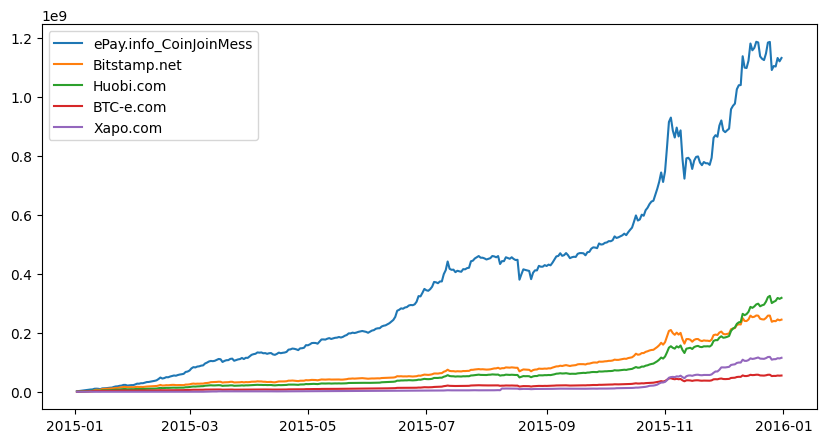

In [108]:
top_actors = actor_profits_df.groupby(level=0)['profit_usd'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))
look = ['profit_usd']
for elt in top_actors:
    plt.plot(actor_profits_df.loc[elt].index, actor_profits_df.loc[elt][look], label=elt)

plt.legend()
plt.show()


Il est très important de noter que ces bénéfices ne concernent que les sommes obtenues par échange durant l'année 2015, un acteur optant pour une stratégie de "holding"  laissant ses bitcoins monter tout seul en 2015 aurait dans notre calcul un bénéfice de 0 car il n'a pas obtenu de nouvelles sommes pendant cette période.  

Cela n'a pas d'importance car ici on veut surtout voir quels acteurs accumulent des bitcoins via leur activité.

On groupe les acteurs par quartile pour voir leur impact par groupe.  
Essayons de voir si les acteurs les plus gros (en terme de bénéfices) échangent plus, ou alors si les échanges par quartiles restent proche de 25 % par quartiles.


In [109]:
# make a df of all the actors and their final profit and profit_usd
final_profits_df = actor_profits_df.groupby(level=0)[['profit', 'profit_usd']].max().sort_values(by='profit_usd', ascending=False)

# divide the actors into quartiles based on their profit
final_profits_df['quartile'] = pd.qcut(final_profits_df['profit'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

final_profits_df.head(3)

,profit,profit_usd,quartile
identity,,,
ePay.info_CoinJoinMess,2.631645e+15,1.185568e+09,Q4
Huobi.com,7.404631e+14,3.248009e+08,Q4
Bitstamp.net,5.688628e+14,2.584437e+08,Q4


Q4 correspond aux 25 acteurs ayant les meilleurs profits, Q3 les 25 suivants, Q2 les 25 encore après et Q1 les 25 derniers.

Ci-dessous on affiche plusieurs stats sur les quartiles pour se rendre compte des différences sur le critère principal des transactions :

In [110]:
# get the list of actors in each quartile
quartile_1 = final_profits_df[final_profits_df['quartile'] == 'Q1'].index.tolist()
quartile_2 = final_profits_df[final_profits_df['quartile'] == 'Q2'].index.tolist()
quartile_3 = final_profits_df[final_profits_df['quartile'] == 'Q3'].index.tolist()
quartile_4 = final_profits_df[final_profits_df['quartile'] == 'Q4'].index.tolist()

# get the number of transactions of each quartile
quartile_1_transactions = actor_df.loc[quartile_1]['nb_transactions'].sum()
quartile_2_transactions = actor_df.loc[quartile_2]['nb_transactions'].sum()
quartile_3_transactions = actor_df.loc[quartile_3]['nb_transactions'].sum()
quartile_4_transactions = actor_df.loc[quartile_4]['nb_transactions'].sum()

# Get the number of transactions of the top 5 actors
top_5_transactions = actor_df.loc[top_actors]['nb_transactions'].sum()

# Dataframe regrouping informations about transactions
transactions_df = pd.DataFrame({"Nombre de transactions" : [quartile_1_transactions, quartile_2_transactions, quartile_3_transactions, quartile_4_transactions, top_5_transactions]}, index=['Q1', 'Q2', 'Q3', 'Q4', 'Somme Top 5'])
transactions_df['Pourcentage des transactions'] = transactions_df["Nombre de transactions"] / actor_df['nb_transactions'].sum() * 100

transactions_df


,Nombre de transactions,Pourcentage des transactions
Q1,150377,2.434294
Q2,394229,6.381757
Q3,575885,9.322394
Q4,5056946,81.861555
Somme Top 5,2602244,42.124978


Numériquement, nous pouvons nous rendre compte que le quartile 4, correspondant aux 25 acteurs ayant fait le plus de profits, monopolise environ 82 % des transactions faites par les 100 plus gros acteurs.

Il est d'autant plus flagrant de voir que les 5 plus gros acteurs font à eux seuls plus de 42 % de toutes les transactions des 100 plus gros acteurs.  

##### Regardons maintenant les meilleurs profits réaliser par les quartiles d'acteurs :

In [111]:
# print best profit per quartile
print('Best profit per quartile')
print('Q1 best profit : ', final_profits_df[final_profits_df['quartile'] == 'Q1']['profit_usd'].max())
print('Q2 best profit : ', final_profits_df[final_profits_df['quartile'] == 'Q2']['profit_usd'].max())
print('Q3 best profit : ', final_profits_df[final_profits_df['quartile'] == 'Q3']['profit_usd'].max())
print('Q4 best profit : ', final_profits_df[final_profits_df['quartile'] == 'Q4']['profit_usd'].max())

Best profit per quartile
Q1 best profit :  1283.497636477758
Q2 best profit :  25308.592849746285
Q3 best profit :  436203.3564301162
Q4 best profit :  1185567995.2787967


Le meilleur profit du quartile Q4 est 2718 fois plus grand que le quartile Q3. Un écart immense en terme de profits.


Ci-dessous est affiché un treemap qui représente l'impact sur le réseaux de chaque quartile.

La taille que prend une section correspond aux nombres de transactions totales effectuées par l'acteur.
Ceux-ci sont séparés par une couleur en fonction de leurs profits.

In [112]:
# add identity to the final_profits_df dataframe
final_profits_df['identity'] = final_profits_df.index.get_level_values(0).unique()

# add a log scale column of the profit
final_profits_df['log_profit'] = np.log(np.abs(final_profits_df['profit_usd']))

# add a column with the number of transactions
final_profits_df['nb_transactions'] = actor_df.groupby(level=0)['nb_transactions'].sum()

fig = px.treemap(final_profits_df, path=[px.Constant('actors'), 'quartile', 'identity'], values='nb_transactions', color='log_profit', color_continuous_scale='RdBu', hover_data={'profit_usd':':.2e'})
fig.show()

Nous pouvons, avec cette figure, observer que sur l'année 2015 seulement une poignée d'acteurs ont totalement dominés le marché.  
Les 25 plus gros acteurs du Q4 occupent 80 % des transactions et ont des bénéfices allant jusqu'au milliard.  
Les acteurs du Q3 occupent environ 10 % des transactions et ont des bénéfices allant jusqu'à plusieurs centaines de milliers de dollars.  
Les acteurs du Q2 occupent environ 6.5 % des transactions et ont des bénéfices allant jusqu'à la dizaine de milliers de dollars.  
Enfin les acteurs du Q1 occupent les 2.5% restants et ont des bénéfices allant jusqu'au millier.  

Nous allons maintenant comparer le profit des acteurs sur une courte période en fonction des quartiles.  
  
#### Affichage du cours du bitcoin

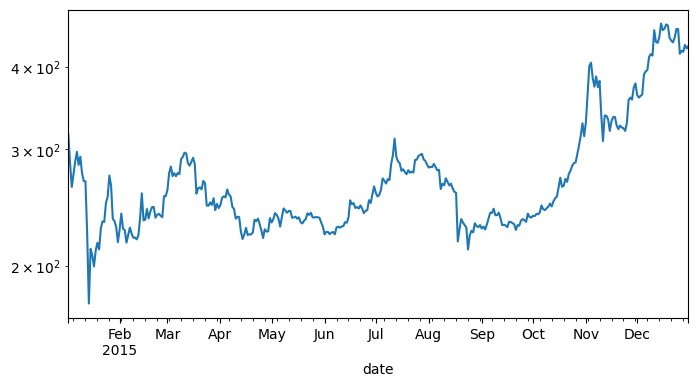

In [113]:
external_df['PriceUSD'].plot(figsize=(8, 4), logy=True)

plt.show()

Zoom sur une période précise : ici on identifie une forte baisse de la valeur du bitcoin de mars 2015 et on veut voir si cela influe sur le profit des acteurs.

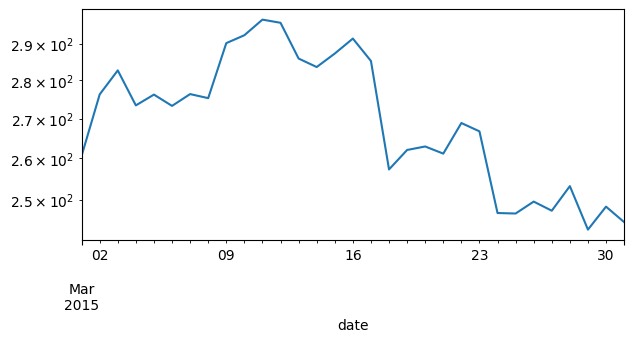

In [114]:
# look at the date range from 2015-03-01 to 2015-03-31
date_range = ['2015-03-01', '2015-03-31']
external_df['PriceUSD'].loc[date_range[0]:date_range[1]].plot(figsize=(7, 3), logy=True)

plt.show()

Voici plus haut le cours BTC en USD lors de cette période.  

Réorganisons les données afin d'afficher les profits des 4 quartiles sur cette période. 

In [117]:
# set the date as a column
actor_df.reset_index(inplace=True)

# set the date as the index
actor_df.set_index('date', inplace=True)

# only keep the date range
actor_df_2015_08 = actor_df.loc[date_range[0]:date_range[1]]

actor_df_2015_08.reset_index(inplace=True)
actor_df_2015_08.set_index('identity', inplace=True)
actor_df_2015_08 = actor_df_2015_08.groupby([actor_df_2015_08.index, 'date']).sum()

# group the actor_df_2015_08 dataframe by quartile
for elt in final_profits_df['quartile'].unique():
    # update the actor_df_2015_08 dataframe
    actor_df_2015_08['quartile'] = actor_df_2015_08.index.get_level_values(0).map(final_profits_df.set_index('identity')['quartile'])

# set the quartile as the index
actor_df_2015_08.reset_index(inplace=True)
actor_df_2015_08.set_index('quartile', inplace=True)

#group the actor_df_2015_08 dataframe by quartile
actor_df_2015_08 = actor_df_2015_08.groupby([actor_df_2015_08.index, 'date']).sum()


/tmp/ipykernel_15460/2048687361.py:24: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



/tmp/ipykernel_15460/1102895590.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



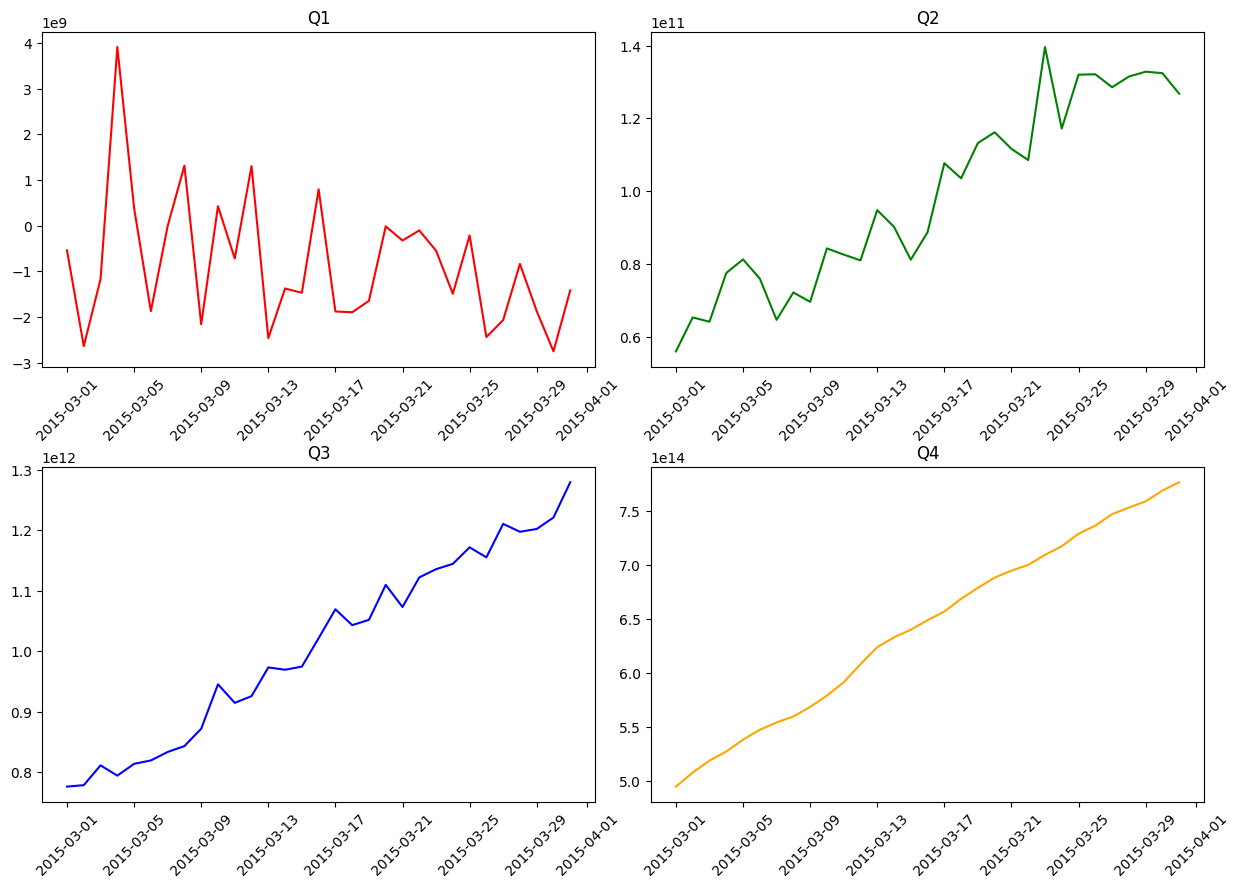

In [116]:
# plot the number of transactions of each quartile
look = 'profit'
# square 2*2
fig, ax = plt.subplots(2, 2, figsize=(15, 10))


#plt.plot(actor_df_2015_08.loc['Q1'][look], label='Q1')
# 1 plot per quartile

# Q1
ax[0, 0].plot(actor_df_2015_08.loc['Q1'][look], label='Q1', color='red', )

# Q2
ax[0, 1].plot(actor_df_2015_08.loc['Q2'][look], label='Q2', color='green')

# Q3
ax[1, 0].plot(actor_df_2015_08.loc['Q3'][look], label='Q3', color='blue')

# Q4
ax[1, 1].plot(actor_df_2015_08.loc['Q4'][look], label='Q4', color='orange')

# set the title
ax[0, 0].set_title('Q1')
ax[0, 1].set_title('Q2')
ax[1, 0].set_title('Q3')
ax[1, 1].set_title('Q4')

for elt in ax.flat:
    elt.set_xticklabels(elt.get_xticklabels(), rotation=45)
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# show the plot
plt.show()


On observe que le cours du bitcoin n'a pas d'influence sur le bénéfice en bitcoin des acteurs ce qui veut dire qu'ils ne vendent pas ou n'achètent pas particulièrement plus en fonction du cours sur une petite période.

Par contre on voit que plus les acteurs sont gros, plus leurs bénéfices sont stable. On voit une augmentation linéaire du profit chez Q4 tandis que la courbe devient de plus en plus variable en s'approchant de Q1.

#### Conclusion
---

En conclusion on observe une réelle différence entre les acteurs les plus actifs/profitable et le reste.  
Plus les acteurs échangent plus ils accumulent d'actifs et font des bénéfices supplémentaires.  

La différence d'échelle est importante avec les 5 plus gros acteurs occupant 42% des transactions et l'acteur ePayInfo faisant un bénéfice de 1.2 milliards en 2015 uniquement par accumulation.